In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.csv')

In [2]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
display(students.isnull().sum())
print('Столбцов содержащих пустые значения:', len(
    students.columns[students.isna().any()]))

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

Столбцов содержащих пустые значения: 27


# Предобработка

In [106]:
# Переименование столбца с неудобным названием
students.rename(
    columns={'studytime, granular': 'studytime_granular'}, inplace=True)


def get_unique_list(values):  # список уникальных значений для столбцов объектного типа
    unique = []
    for elem in values:
        if elem not in unique:
            unique.append(elem)
    return print('Список уникальных значений: {}'.format(unique))


def object_count(column):  # базовое распределение столбцов объектного типа
    unique = print('Количество не пустых уникальных значений:',
                   column.nunique())
    counts = display(pd.DataFrame(column.value_counts()))


def info(column):  # базовое распределение значений числовых столбцов
    describe = print(column.describe())


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # поправка Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

# EDA

# school — аббревиатура школы, в которой учится ученик

In [5]:
object_count(students.school)

Количество не пустых уникальных значений: 2


,school
GP,349
MS,46


# sex — пол ученика ('F' - женский, 'M' - мужской)

In [6]:
object_count(students.sex)

Количество не пустых уникальных значений: 2


,sex
F,208
M,187


# age — возраст ученика (от 15 до 22)

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


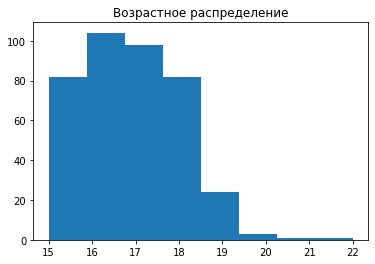

In [7]:
hist = students.age.hist(bins=8, grid=False)
hist.set_title('Возрастное распределение')
display(pd.DataFrame(students.age.value_counts()))

In [8]:
students.age.median()

17.0

# address — тип адреса ученика ('U' - городской, 'R' - за городом)

In [9]:
object_count(students.address)
students.loc[:, ['address']].info()

Количество не пустых уникальных значений: 2


,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [10]:
get_unique_list(students.address)

Список уникальных значений: ['U', nan, 'R']


In [11]:
students.address = students.address.fillna('U', limit=13)
students.address = students.address.fillna('R', limit=4)

In [12]:
students.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# famsize — размер семьи('LE3' <= 3, 'GT3' >3)

In [13]:
object_count(students.famsize)
students.loc[:, ['famsize']].info()

Количество не пустых уникальных значений: 2


,famsize
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [14]:
get_unique_list(students.famsize)

Список уникальных значений: [nan, 'GT3', 'LE3']


In [15]:
students.famsize = students.famsize.fillna('GT3', limit=19)
students.famsize = students.famsize.fillna('LE3', limit=8)

In [16]:
students.loc[:, ['famsize']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [17]:
object_count(students.Pstatus)

Количество не пустых уникальных значений: 2


,Pstatus
T,314
A,36


In [18]:
get_unique_list(students.Pstatus)

Список уникальных значений: ['A', nan, 'T']


In [19]:
students.Pstatus = students.Pstatus.fillna('T', limit=40)
students.Pstatus = students.Pstatus.fillna('A', limit=5)

# Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64


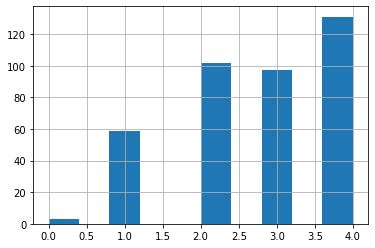

In [20]:
info(students.Medu)

,Medu
4.0,131
2.0,102
3.0,100
1.0,59
0.0,3


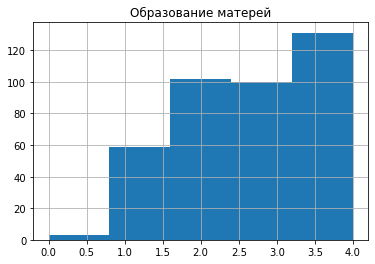

In [21]:
students.Medu = students.Medu.apply(
    lambda x: students.Medu.median() if pd.isna(x) else x)
ax = students.Medu.hist(bins=5)
ax.set_title('Образование матерей')
pd.DataFrame(students.Medu.value_counts())

# Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

count    395.000000
mean       2.486076
std        1.062362
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64


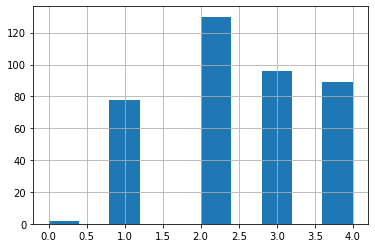

In [46]:
info(students.Fedu)
students.Fedu.hist()

In [23]:
pd.DataFrame(students.Fedu.value_counts())

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


,Fedu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


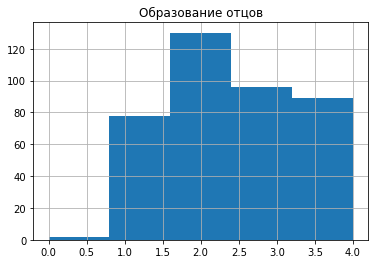

In [24]:
students.Fedu = students.Fedu.apply(
    lambda x: 4 if x == 40 else students.Fedu.median() if pd.isna(x) else x)
ax = students.Fedu.hist(bins=5)
ax.set_title('Образование отцов')
pd.DataFrame(students.Fedu.value_counts())

# Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [25]:
object_count(students.Mjob)

Количество не пустых уникальных значений: 5


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


In [26]:
get_unique_list(students.Mjob)

Список уникальных значений: ['at_home', 'health', 'other', 'services', 'teacher', nan]


# Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [27]:
object_count(students.Fjob)

Количество не пустых уникальных значений: 5


,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


In [28]:
get_unique_list(students.Fjob)

Список уникальных значений: ['teacher', 'other', nan, 'health', 'services', 'at_home']


# Групповая обработка номативных переменных

In [29]:
for col in [students.reason, students.guardian, students.schoolsup, students.famsup, students.paid, students.activities, students.nursery, students.higher, students.internet, students.romantic]:
    get_unique_list(col)
    print('Пустых значений в', col.name, "-", col.isna().sum())
    object_count(col)

Список уникальных значений: ['course', 'other', 'home', 'reputation', nan]
Пустых значений в reason - 17
Количество не пустых уникальных значений: 4


,reason
course,137
home,104
reputation,103
other,34


Список уникальных значений: ['mother', 'father', 'other', nan]
Пустых значений в guardian - 31
Количество не пустых уникальных значений: 3


,guardian
mother,250
father,86
other,28


Список уникальных значений: ['yes', 'no', nan]
Пустых значений в schoolsup - 9
Количество не пустых уникальных значений: 2


,schoolsup
no,335
yes,51


Список уникальных значений: ['no', 'yes', nan]
Пустых значений в famsup - 39
Количество не пустых уникальных значений: 2


,famsup
yes,219
no,137


Список уникальных значений: ['no', nan, 'yes']
Пустых значений в paid - 40
Количество не пустых уникальных значений: 2


,paid
no,200
yes,155


Список уникальных значений: ['no', 'yes', nan]
Пустых значений в activities - 14
Количество не пустых уникальных значений: 2


,activities
yes,195
no,186


Список уникальных значений: ['yes', 'no', nan]
Пустых значений в nursery - 16
Количество не пустых уникальных значений: 2


,nursery
yes,300
no,79


Список уникальных значений: ['yes', nan, 'no']
Пустых значений в higher - 20
Количество не пустых уникальных значений: 2


,higher
yes,356
no,19


Список уникальных значений: [nan, 'yes', 'no']
Пустых значений в internet - 34
Количество не пустых уникальных значений: 2


,internet
yes,305
no,56


Список уникальных значений: ['no', nan, 'yes']
Пустых значений в romantic - 31
Количество не пустых уникальных значений: 2


,romantic
no,240
yes,124


# Групповая обработка числовых столбцов

In [47]:
for col in [students.traveltime, students.studytime, students.failures, students.studytime_granular, students.famrel, students.freetime, students.goout, students.health, students.absences, students.score]:
    print('Пустых значений в', col.name, "-", col.isna().sum())
    info(col)
    print('\n')

Пустых значений в traveltime - 28
count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64


Пустых значений в studytime - 7
count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


Пустых значений в failures - 22
count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64


Пустых значений в studytime_granular - 7
count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64


Пустых значений в famrel - 27
count    368.000000
mean       3.937500
std   

# reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [31]:
students[students['reason'] == 'course'].groupby(['school']).count()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
school,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GP,119,119,119,119,119,119,119,114,107,119,110,108,118,113,116,108,109,114,117,118,110,105,110,108,117,115,115,114,117
MS,18,18,18,18,18,18,18,18,17,18,12,17,18,18,17,18,18,17,16,18,17,17,18,15,18,18,18,17,18


# guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

# traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

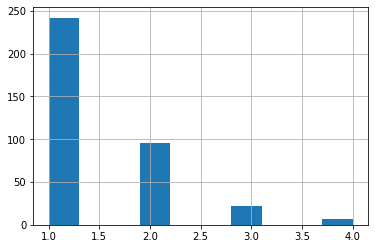

In [50]:
students.traveltime.hist()

,traveltime
1.0,270
2.0,96
3.0,22
4.0,7


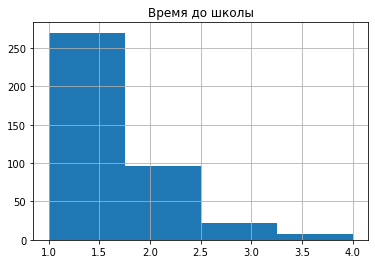

In [51]:
students.traveltime = students.traveltime.apply(
    lambda x: students.traveltime.median() if pd.isna(x) else x)
hist_t = students.traveltime.hist(bins=4)
hist_t.set_title('Время до школы')
pd.DataFrame(students.traveltime.value_counts())

# studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

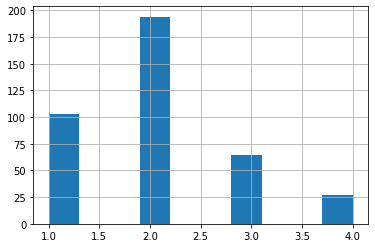

In [52]:
students.studytime.hist()

,studytime
2.0,201
1.0,103
3.0,64
4.0,27


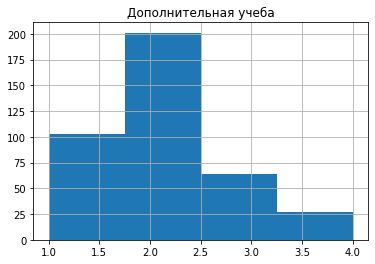

In [53]:
students.studytime = students.studytime.apply(
    lambda x: students.studytime.median() if pd.isna(x) else x)
hist_s = students.studytime.hist(bins=4)
hist_s.set_title('Дополнительная учеба')
pd.DataFrame(students.studytime.value_counts())

# failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

,failures
0.0,293
1.0,49
2.0,16
3.0,15


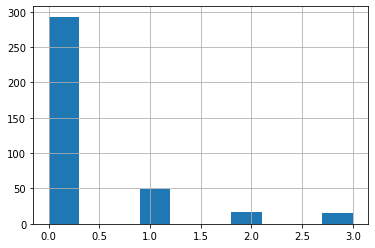

In [55]:
students.failures.hist()
pd.DataFrame(students.failures.value_counts())

,failures
0.0,315
1.0,49
2.0,16
3.0,15


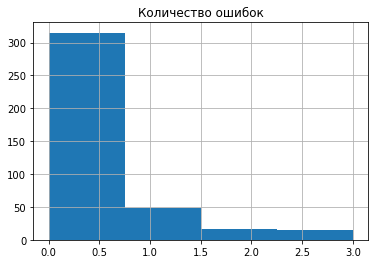

In [56]:
students.failures = students.failures.apply(
    lambda x: students.failures.median() if pd.isna(x) else x)
hist_s = students.failures.hist(bins=4)
hist_s.set_title('Количество ошибок')
pd.DataFrame(students.failures.value_counts())

# schoolsup — дополнительная образовательная поддержка (yes или no)

In [32]:
students.schoolsup = students.schoolsup.fillna('yes', limit=2)
students.schoolsup = students.schoolsup.fillna('no', limit=7)

# famsup — семейная образовательная поддержка (yes или no)

In [33]:
students.famsup = students.famsup.fillna('yes', limit=24)
students.famsup = students.famsup.fillna('no', limit=15)

# paid — дополнительные платные занятия по математике (yes или no)

In [34]:
students.paid = students.paid.fillna('yes', limit=17)
students.paid = students.paid.fillna('no', limit=23)

# activities — дополнительные внеучебные занятия (yes или no)

In [35]:
students.activities = students.activities.fillna('yes', limit=7)
students.activities = students.activities.fillna('no', limit=7)

# nursery — посещал детский сад (yes или no)

In [36]:
students.nursery = students.nursery.fillna('yes', limit=12)
students.nursery = students.nursery.fillna('no', limit=4)

# studytime_granular

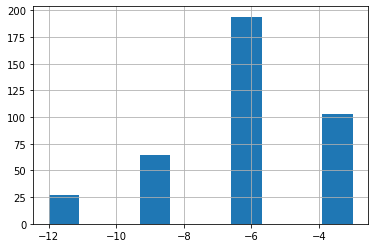

In [57]:
students.studytime_granular.hist()

,studytime_granular
-6.0,201
-3.0,103
-9.0,64
-12.0,27


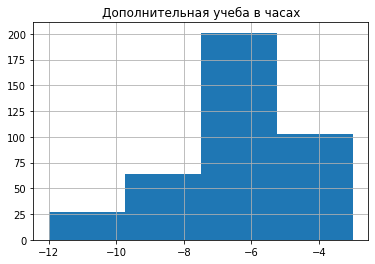

In [58]:
students.studytime_granular = students.studytime_granular.apply(
    lambda x: students.studytime_granular.median() if pd.isna(x) else x)
hist_s = students.studytime_granular.hist(bins=4)
hist_s.set_title('Дополнительная учеба в часах')
pd.DataFrame(students.studytime_granular.value_counts())

# higher — хочет получить высшее образование (yes или no)

In [37]:
students.higher = students.higher.fillna('yes', limit=19)
students.higher = students.higher.fillna('no', limit=1)

# internet — наличие интернета дома (yes или no)

In [38]:
students.internet = students.internet.fillna('yes', limit=28)
students.internet = students.internet.fillna('no', limit=6)

# romantic — в романтических отношениях (yes или no)

In [39]:
students.romantic = students.romantic.fillna('yes', limit=10)
students.romantic = students.romantic.fillna('no', limit=21)

# famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

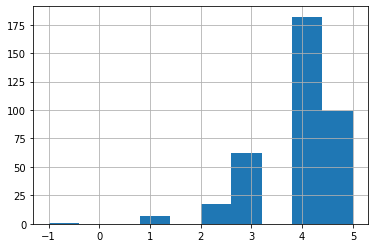

In [60]:
students.famrel.hist()

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,7


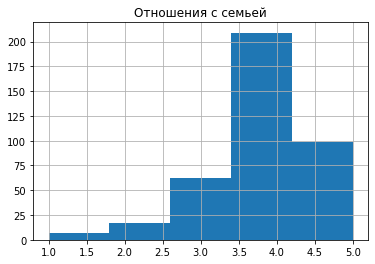

In [65]:
students.famrel = students.famrel.apply(
    lambda x: students.famrel.median() if pd.isna(x) else x)
hist_s = students.famrel.hist(bins=5)
hist_s.set_title('Отношения с семьей')
pd.DataFrame(students.famrel.value_counts())

In [64]:
students = students.loc[students.famrel > 0]

# freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

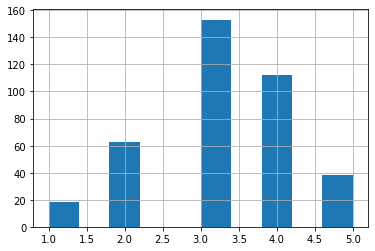

In [59]:
students.freetime.hist()

,freetime
3.0,164
4.0,112
2.0,62
5.0,38
1.0,18


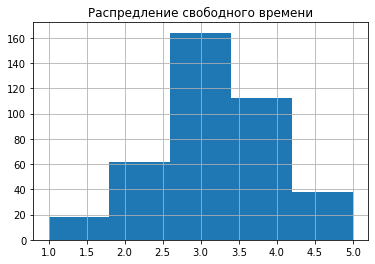

In [66]:
students.freetime = students.freetime.apply(
    lambda x: students.freetime.median() if pd.isna(x) else x)
hist_s = students.freetime.hist(bins=5)
hist_s.set_title('Распредление свободного времени')
pd.DataFrame(students.freetime.value_counts())

# goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

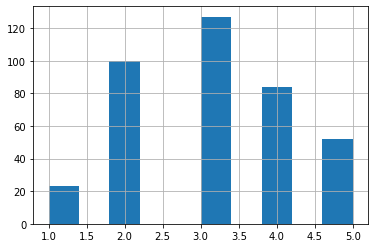

In [67]:
students.goout.hist()

,goout
3.0,135
2.0,100
4.0,84
5.0,52
1.0,23


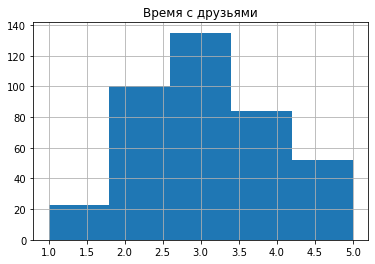

In [69]:
students.goout = students.goout.apply(
    lambda x: students.goout.median() if pd.isna(x) else x)
hist_s = students.goout.hist(bins=5)
hist_s.set_title('Время с друзьями')
pd.DataFrame(students.goout.value_counts())

# health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

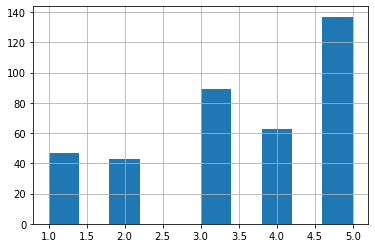

In [70]:
students.health.hist()

,health
5.0,137
3.0,89
4.0,78
1.0,47
2.0,43


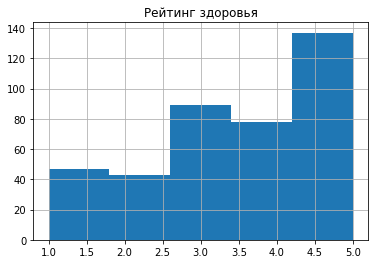

In [71]:
students.health = students.health.apply(
    lambda x: students.health.median() if pd.isna(x) else x)
hist_s = students.health.hist(bins=5)
hist_s.set_title('Рейтинг здоровья')
pd.DataFrame(students.health.value_counts())

# absences — количество пропущенных занятий

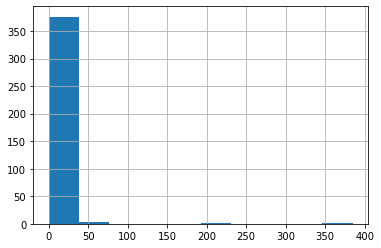

In [74]:
students.absences.hist()

In [83]:
students.absences = students.absences.apply(
    lambda x: students.absences.median() if pd.isna(x) else x)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


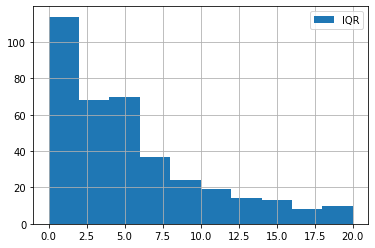

In [85]:
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

students.absences.loc[students.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, label='IQR')

plt.legend()

In [86]:
students = students.loc[students.absences.between(0, perc75 + 1.5*IQR)]

# score — баллы по госэкзамену по математике

6

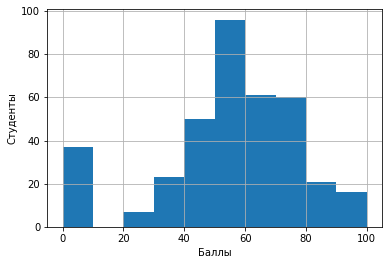

In [96]:
hist = students.score.hist(bins=10, range=(0, 100))
hist.set_xlabel('Баллы')
hist.set_ylabel('Студенты')
students.score.isna().sum()

In [97]:
students = students.loc[students.score.isna() == False]

In [101]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.164431,-0.163137,0.076821,-0.014986,0.198110,0.014986,0.046929,0.035512,0.134715,-0.061916,0.157008,-0.163932
Medu,-0.164431,1.000000,0.590115,-0.165491,0.096267,-0.246760,-0.096267,-0.009116,0.055362,0.060126,-0.049172,0.069802,0.215910
Fedu,-0.163137,0.590115,1.000000,-0.108751,0.017381,-0.279380,-0.017381,-0.014093,-0.013388,0.042915,0.005898,-0.026143,0.121476
traveltime,0.076821,-0.165491,-0.108751,1.000000,-0.087690,0.045950,0.087690,-0.032678,-0.007948,0.037827,-0.033246,-0.035763,-0.055144
studytime,-0.014986,0.096267,0.017381,-0.087690,1.000000,-0.171216,-1.000000,0.024909,-0.138858,-0.045289,-0.075607,-0.068056,0.117477
failures,0.198110,-0.246760,-0.279380,0.045950,-0.171216,1.000000,0.171216,-0.008840,0.082750,0.091737,0.088915,0.067348,-0.340421
studytime_granular,0.014986,-0.096267,-0.017381,0.087690,-1.000000,0.171216,1.000000,-0.024909,0.138858,0.045289,0.075607,0.068056,-0.117477
famrel,0.046929,-0.009116,-0.014093,-0.032678,0.024909,-0.008840,-0.024909,1.000000,0.155136,0.058456,0.092147,-0.069598,0.060526
freetime,0.035512,0.055362,-0.013388,-0.007948,-0.138858,0.082750,0.138858,0.155136,1.000000,0.278942,0.059876,0.096792,0.037052
goout,0.134715,0.060126,0.042915,0.037827,-0.045289,0.091737,0.045289,0.058456,0.278942,1.000000,-0.003909,0.114076,-0.111767


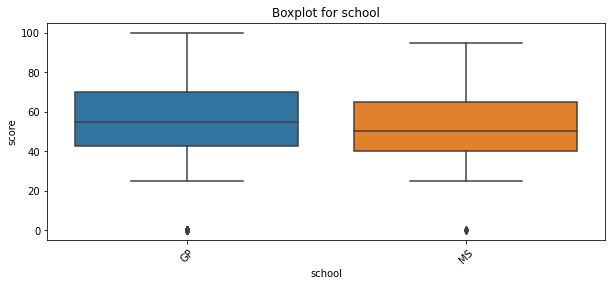

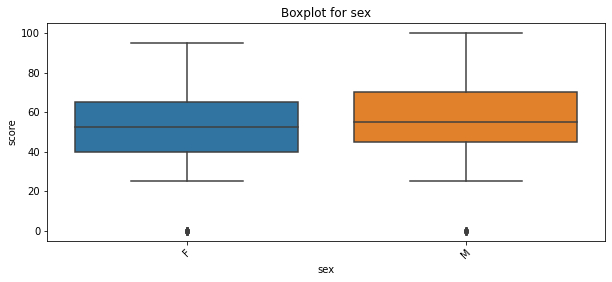

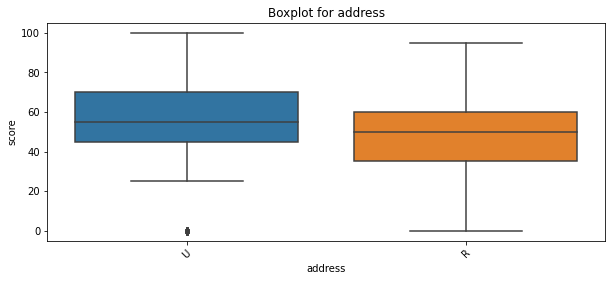

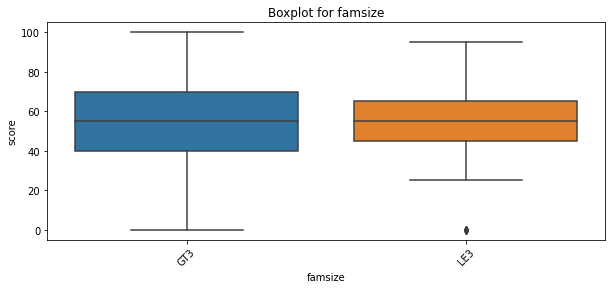

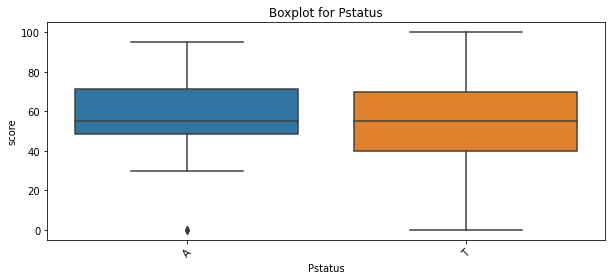

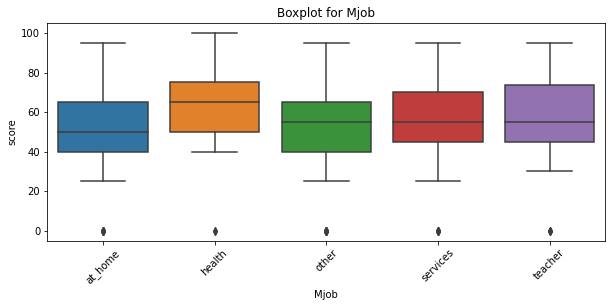

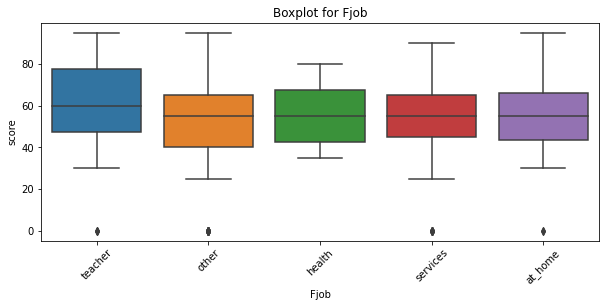

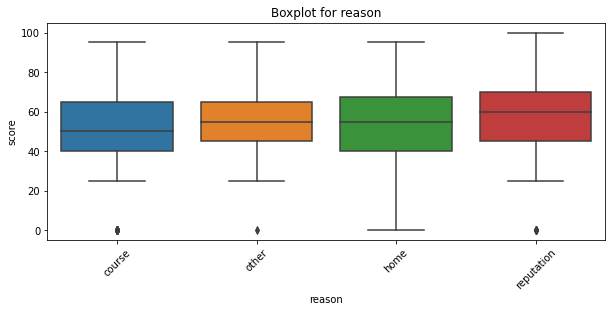

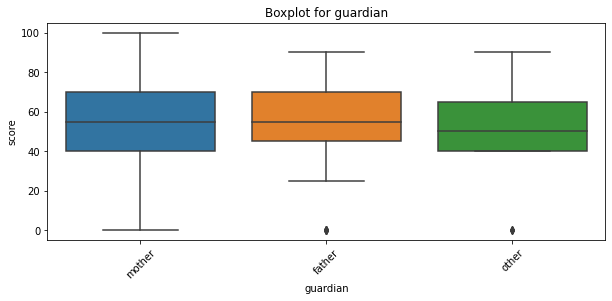

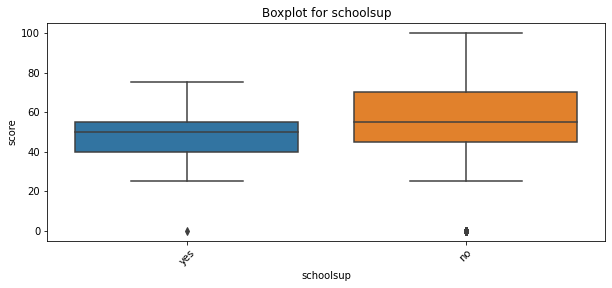

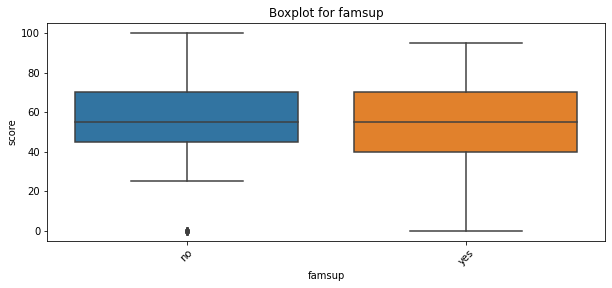

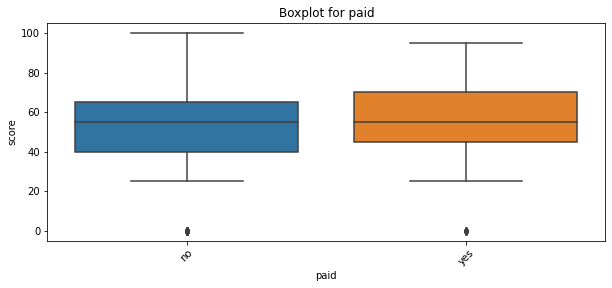

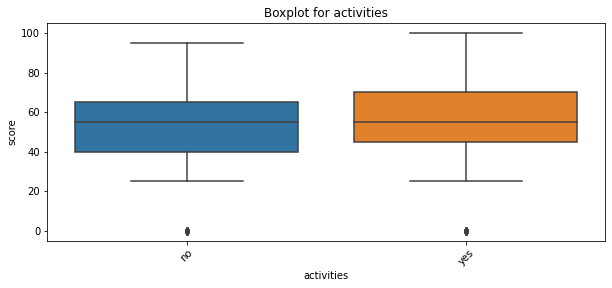

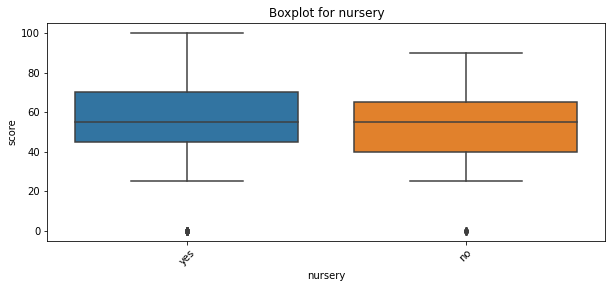

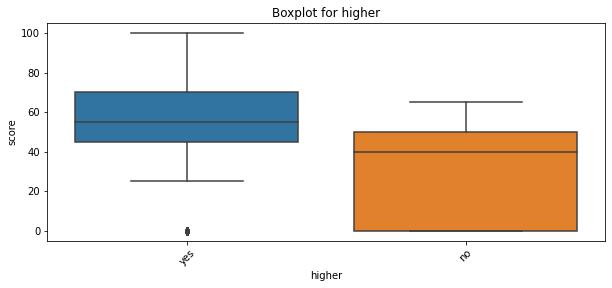

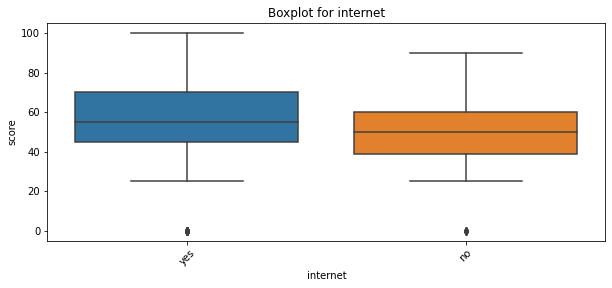

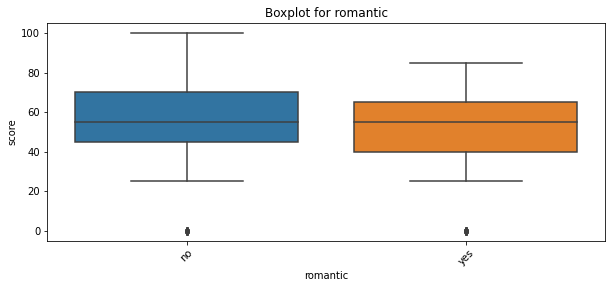

In [107]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [108]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [110]:
students_for_model = students.loc[:, ['age', 'sex', 'address', 'Mjob', 'paid', 'higher', 'romantic', 'Medu',
                                      'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences']]
students_for_model.head(20)

,age,sex,address,Mjob,paid,higher,romantic,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences
0,18,F,U,at_home,no,yes,no,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0
1,17,F,U,at_home,no,yes,no,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0
2,15,F,U,at_home,yes,yes,yes,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0
3,15,F,U,health,yes,yes,yes,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0
4,16,F,U,other,yes,yes,no,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0
5,16,M,U,services,yes,yes,no,4.0,3.0,1.0,2.0,0.0,5.0,4.0,2.0,5.0,10.0
6,16,M,U,other,no,yes,no,2.0,2.0,1.0,2.0,0.0,4.0,4.0,4.0,3.0,0.0
7,17,F,U,other,no,yes,no,4.0,4.0,2.0,2.0,0.0,4.0,1.0,4.0,1.0,6.0
8,15,M,U,services,yes,yes,no,3.0,2.0,1.0,2.0,0.0,4.0,2.0,2.0,1.0,0.0
9,15,M,U,other,yes,yes,no,3.0,4.0,1.0,2.0,0.0,5.0,5.0,1.0,5.0,0.0


In [111]:
students_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 394
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         371 non-null    int64  
 1   sex         371 non-null    object 
 2   address     371 non-null    object 
 3   Mjob        354 non-null    object 
 4   paid        371 non-null    object 
 5   higher      371 non-null    object 
 6   romantic    371 non-null    object 
 7   Medu        371 non-null    float64
 8   Fedu        371 non-null    float64
 9   traveltime  371 non-null    float64
 10  studytime   371 non-null    float64
 11  failures    371 non-null    float64
 12  famrel      371 non-null    float64
 13  freetime    371 non-null    float64
 14  goout       371 non-null    float64
 15  health      371 non-null    float64
 16  absences    371 non-null    float64
dtypes: float64(10), int64(1), object(6)
memory usage: 52.2+ KB


In [112]:
students_for_model.to_csv('stud_model.csv', index=False)